In [5]:
!pip3 install nltk

# !pip install --user nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
!pip3 install numpy
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.9 MB 9.0 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:
import time
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maheshalyana/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maheshalyana/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maheshalyana/nltk_data...


True

In [9]:
!pip3 install pandas
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Load dataset
df = pd.read_csv("./training_data.csv")

# Remove unnecessary columns
df = df.drop(['Source', 'PublishDate'], axis=1)

# Remove missing values
df = df.dropna()

# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens to form text again
    text = " ".join(tokens)
    
    return text

# Preprocess text in the dataset
df['clean_title'] = df['Title'].apply(preprocess_text)


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.9 MB 13.3 MB/s eta 0:00:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [10]:
df.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000
mean,142.675225,5.016737,14.014269,-0.007364,-0.029286
std,745.148920,22.592353,73.032200,0.135795,0.142007
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116213
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,39.000000,2.000000,4.000000,0.062500,0.057474
max,40836.000000,1267.000000,3652.000000,0.962354,0.900000


In [11]:
df.shape

(40508, 10)

In [12]:
df['clean_headline'] = df['Headline'].apply(preprocess_text)

In [13]:
!pip3 install gensim
import gensim

# Convert preprocessed text to gensim dictionary and corpus
texts = [doc.split() for doc in df['clean_title']]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define number of topics and run LDA model
num_topics = 4
time_lda1  = time.time()
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
time_lda2 = time.time()
print(time_lda2 - time_lda1) 
# Print top words in each topic
# for topic in lda_model.show_topics(num_topics=num_topics):
#     print(topic)


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 24.0 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 28.9 MB 6.7 MB/s eta 0:00:011
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
24.123841047286987


In [ ]:
import gensim

# Convert preprocessed text to gensim dictionary and corpus
texts = [doc.split() for doc in df['clean_headline']]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define number of topics and run LDA model
num_topics = 5
time_lda1 = time.time()
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
time_lda2 = time.time()
print(time_lda2 - time_lda1)


# Print top words in each topic
for topic in lda_model.show_topics(num_topics=num_topics):
    print(topic)

79.7462682723999
(0, '0.018*"economy" + 0.008*"economic" + 0.007*"presidential" + 0.006*"said" + 0.006*"new" + 0.005*"say" + 0.005*"chief" + 0.004*"need" + 0.004*"sander" + 0.004*"people"')
(1, '0.055*"economy" + 0.018*"economic" + 0.016*"year" + 0.011*"growth" + 0.010*"u" + 0.010*"global" + 0.010*"market" + 0.009*"china" + 0.008*"percent" + 0.008*"said"')
(2, '0.024*"palestine" + 0.019*"palestinian" + 0.008*"minister" + 0.008*"israel" + 0.007*"israeli" + 0.005*"east" + 0.005*"state" + 0.005*"international" + 0.004*"west" + 0.004*"said"')
(3, '0.055*"microsoft" + 0.015*"new" + 0.012*"window" + 0.010*"company" + 0.008*"10" + 0.008*"microsofts" + 0.007*"surface" + 0.006*"’" + 0.006*"one" + 0.006*"announced"')
(4, '0.075*"obama" + 0.067*"president" + 0.038*"barack" + 0.014*"u" + 0.011*"obamas" + 0.011*"said" + 0.011*"state" + 0.010*"republican" + 0.010*"house" + 0.009*"washington"')


In [ ]:
doc_topic_matrix = np.zeros((len(corpus), num_topics))
for i, doc in enumerate(corpus):
    topic_distribution = lda_model[doc]
    for topic in topic_distribution:
        doc_topic_matrix[i, topic[0]] = topic[1]

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
X = doc_topic_matrix
y = df['SentimentTitle'].values

print(X)

svm_model = SVR(kernel='linear')
SVR_beg = time.time()
svm_model.fit(X, y)
SVR_end = time.time()
x = SVR_end - SVR_beg
# Evaluate SVM model
y_pred = svm_model.predict(X)
mse = mean_squared_error(y, y_pred)
print("MSE: {:.4f}".format(mse))

MSE: 0.0184


In [ ]:
print(y_pred)
print(y_pred.shape)

[-0.00010739 -0.01018713 -0.00269866 ... -0.02689736  0.00058532
 -0.00357187]
(40508,)


1.6729533672332764


AttributeError: 'Axes' object has no attribute 'invert_axes'

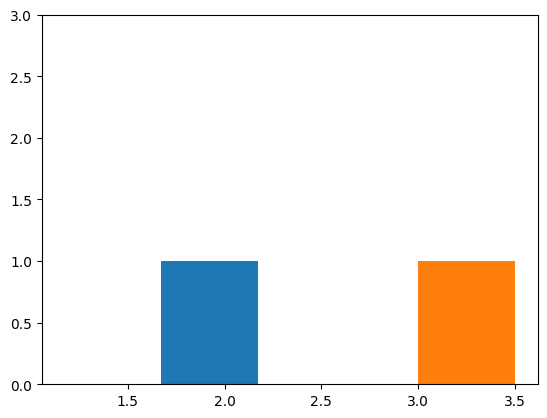

In [ ]:
import matplotlib.pyplot as plt
print(x)
X = x
y = 3
plt.hist(X,2)
plt.hist(y,2)
plt.ylim(0, 3)
plt.gca().invert_axes()
plt.show()

In [ ]:
import joblib
joblib.dump(svm_model, 'LDA_SVR.pkl')

['LDA_SVR.pkl']

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

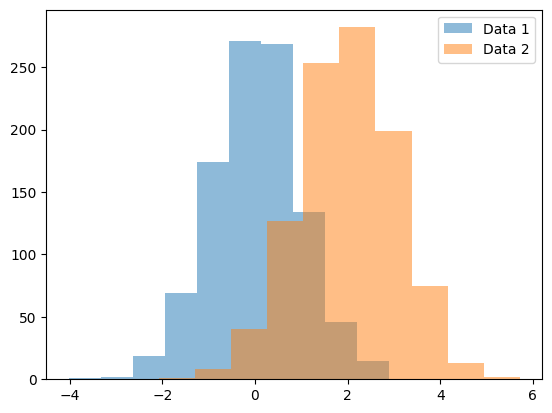

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(2, 1, 1000)

# Plot two histograms side by side
plt.hist(data1, alpha=0.5, label='Data 1')
plt.hist(data2, alpha=0.5, label='Data 2')
plt.legend()
plt.show()

In [ ]:
import joblib
clf = joblib.load('LDA_SVR.pkl')

In [ ]:
import gzip, pickle
with gzip.open('LDA_SVR.pkl', 'wb') as ofp:
    pickle.dump('LDA_SVR.pkl', ofp)

In [ ]:
with gzip.open('LDA_SVR.pkl', 'rb') as ifp:
    print(pickle.load(ifp))

LDA_SVR.pkl


In [ ]:
new_data = pd.read_csv('test_data.csv')
# Make predictions on the new data
prediction = svm_model.predict(new_data)
print(prediction)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVR
# from sklearn.metrics import classification_report

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df['clean_title'], df['SentimentTitle'], test_size=0.2, random_state=42)

# # Vectorize text using TF-IDF
# vec_time1 = time.time()
# vectorizer = TfidfVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)
# vec_time2 = time.time()
# print('time taken to vectorize:',vec_time2- vec_time1)
# print(X_train_vec.shape)
# print(X_test_vec.shape)
# x_title = X_train

time taken to vectorize: 0.3063821792602539
(32406, 18481)
(8102, 18481)


In [ ]:
# print(y_train.value_counts())


 0.000000    6645
 0.041667     409
 0.044194     368
-0.041667     299
 0.039528     283
             ... 
-0.036182       1
 0.027862       1
-0.091213       1
 0.073546       1
-0.173529       1
Name: SentimentTitle, Length: 6601, dtype: int64


In [ ]:
# # Train SVM classifier
# svmTitle = LinearSVR()

# svmTitle.fit(X_train_vec, y_train)

# # Predict on test data
# y_pred = svmTitle.predict(X_test_vec)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.metrics import classification_report

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df['clean_headline'], df['SentimentHeadline'], test_size=0.2, random_state=42)

# # Vectorize text using TF-IDF
# vec_time1 = time.time()

# vectorizer = TfidfVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)
# vec_time2 = time.time()
# print('time taken to vectorize:',vec_time2- vec_time1)

# print(X_train_vec.shape)
# print(X_test_vec.shape)
# x_Headline = X_train

time taken to vectorize: 0.5368139743804932
(32406, 33111)
(8102, 33111)


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1681: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1


In [ ]:
# import time

In [ ]:
# # Train SVM classifier
# time1 = time.time()
# svmHeadline = LinearSVR()
# svmHeadline.fit(X_train_vec, y_train)
# time2 = time.time()
# print('time taken to train SVR',time2-time1)
# # Predict on test data
# y_pred = svmHeadline.predict(X_test_vec)

time taken to train SVR 2.7494800090789795


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Load dataset
dfTest = pd.read_csv("./test_data.csv")

In [ ]:
# dfTest['clean_title'] = dfTest['Title'].apply(preprocess_text)
# dfTest['clean_headline'] = dfTest['Headline'].apply(preprocess_text)

In [ ]:
# vectorizer = TfidfVectorizer()
# X_train_vec = vectorizer.fit_transform(x_title)
# X_test_vec = vectorizer.transform(dfTest['clean_title'])
# print(X_train_vec.shape)
# print(X_test_vec.shape)
# y_predTitle = svmTitle.predict(X_test_vec)
# print(y_predTitle)

(32406, 18481)
(15424, 18481)
[-0.00245724  0.07815431 -0.01992726 ...  0.00223647  0.09781563
  0.05389482]


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1681: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1


In [ ]:
# vectorizer = TfidfVectorizer()
# X_train_vec = vectorizer.fit_transform(x_Headline)
# X_test_vec = vectorizer.transform(dfTest['clean_headline'])

# y_predHeadline = svmHeadline.predict(X_test_vec)
# print(y_predHeadline)

[-0.00760075  0.14885816 -0.22981724 ... -0.02423804 -0.05248693
  0.17777997]


In [ ]:
# print(type(y_predTitle))
# print(type(y_predHeadline))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# y_idLink = dfTest['IDLink'].to_numpy()
# print(type(y_idLink))

<class 'numpy.ndarray'>


In [ ]:
# submission = pd.DataFrame({
#     "IDLink": y_idLink,
#     "SentimentTitle": y_predTitle,
#     "SentimentHeadline": y_predHeadline
# })
# submission.to_csv("submission.csv", index=False)

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
# import joblib
# joblib.dump(svmHeadline, 'model.pkl')

['model.pkl']

In [ ]:
# import joblib
# clf = joblib.load('model.pkl')

In [ ]:
# import pickle
# import pandas as pd

# # Load the saved model
# with open('model.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Load the new data
# new_data = pd.read_csv('test_data.csv')

# # Make predictions on the new data
# predictions = model.predict(new_data)

# # Print the predictions
# print(predictions)

UnpicklingError: invalid load key, '\x07'.